**Introduction** 

We will be using the NBA data for the __ season to try and determine weather there is a difference in the mean number of 3 point shots made by Point Gaurds and Shooting Gaurds. As shown in the distribution plots (Fig 1), the data is normal enough that the mean and standard deviation are good choices for estimators. We will be testing the null $\mu_1 - \mu_2 = 0$. Let $\mu_1$ and $\mu_2$ be the Point Gaurd and Shooting Gaurd averages respectively.

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [2]:
nba_stats <- read_csv("players_stats.csv")
head(nba_stats)

Rows: 490 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Name, Birth_Place, Birthdate, Collage, Experience, Pos, Team
dbl (27): Games Played, MIN, PTS, FGM, FGA, FG%, 3PM, 3PA, 3P%, FTM, FTA, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,⋯,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AJ Price,26,324,133,51,137,37.2,15,57,26.3,⋯,29,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.79839
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,⋯,30,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.36111
Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,⋯,20,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.14266
Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,⋯,24,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.37775
Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,⋯,29,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.23438
Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,⋯,30,us,"January 4, 1985",NA,10,205.0,C,CHA,130.05,30.94587


smaple introduction we are testing if Pgs make more 3s than Sgs, this corrosponds to the 3P

In [3]:
#Standardized by dividing # of 3 pts made by the games played by each player
tidy_nba <- nba_stats |> 
filter(Pos == "PG" | Pos == "SG") |>
mutate(three_pts_standardized = `3PM`/ `Games Played`) |>
select(Pos, three_pts_standardized)


nba_summary <- tidy_nba |>
group_by(Pos) |>
summarize(mean_three_pts = mean(three_pts_standardized), n = n())


head(tidy_nba)
nba_summary

Pos,three_pts_standardized
<chr>,<dbl>
PG,0.5769231
PG,1.4756098
SG,0.9864865
SG,0.9629630
SG,1.1190476
SG,0.5882353


Pos,mean_three_pts,n
<chr>,<dbl>,<int>
PG,0.8862508,84
SG,1.0099519,100


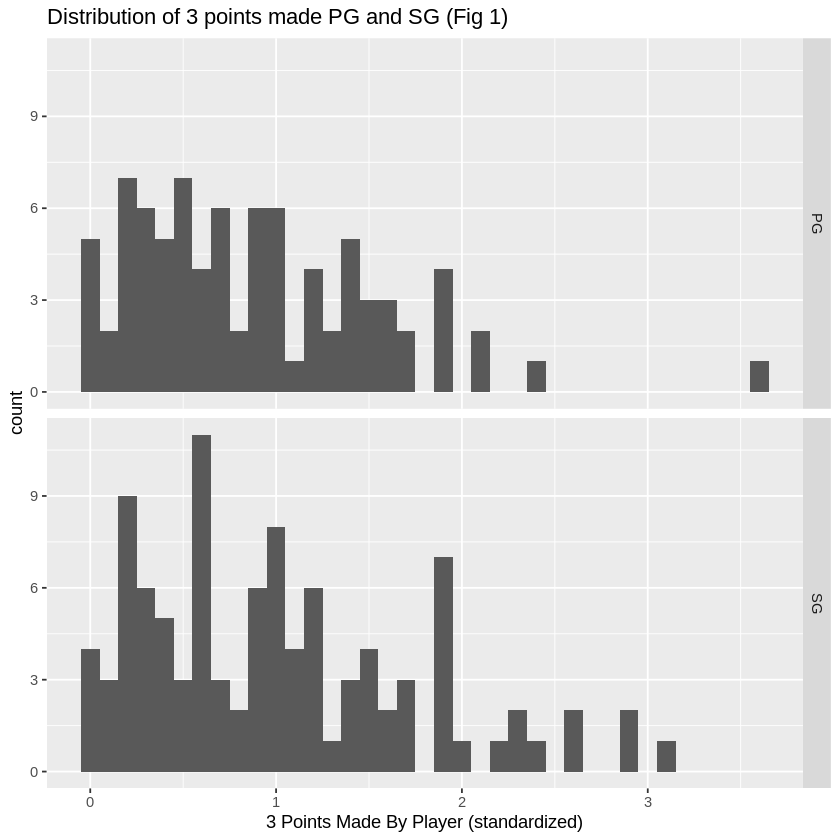

In [4]:
three_point_dist <- tidy_nba |> 
ggplot(aes(x = three_pts_standardized)) + geom_histogram(binwidth = .1) + xlab("3 Points Made By Player (standardized)") +
facet_grid(rows = vars(Pos)) + ggtitle("Distribution of 3 points made PG and SG (Fig 1)")

three_point_dist